# RFM project

 Meaning of RFM：
​
- R(Recency): The interval between the customer's most recent transaction. The larger the R value, the longer the customer's transaction occurred, and vice versa, the more recent the transaction occurred.
- F(Frequency): The number of times a customer has traded in the recent period. The larger the F value, the more frequent the customer's trading, and vice versa, the less active the customer's trading is.
- M(Monetary): The amount of transactions made by the customer in the most recent period. The larger the M value, the higher the customer value, and vice versa.



## Data Analysis

### Import Library

In [1]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-10-03 07:09:50--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 64.233.181.113, 64.233.181.102, 64.233.181.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-03 07:09:50--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.183.132, 2607:f8b0:4001:c64::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.183.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2024-10-03 07:0

In [2]:
# import necessary library
from sklearn.cluster import KMeans  # Used for K-Means clustering algorithm
import matplotlib.pyplot as plt  # Used for drawing charts
import seaborn as sns  # Used for charts
import pandas as pd  # For data processing and analysis
import numpy as np  # For scientific calculation

# Ignore warning messages
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set drawing style
plt.style.use('bmh') # ggplot fivethirtyeight

# Setting pandas display options
pd.set_option('display.max_columns', None)  # Display All Columns
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # Set the display format of floating numbers

In [3]:
from google.colab import drive

# connect to Google Drive
drive.mount('/content/drive')

import pandas as pd  # Import pandas for data processing


dataset_path = '/content/drive/My Drive/项目/rfm/'
df = pd.read_csv(dataset_path+"rfm_stock_data.csv", encoding='ISO-8859-1')

Mounted at /content/drive


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39000,17850.00000,United Kingdom


### Basic data analysis

Basic information of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
!pip install missingno

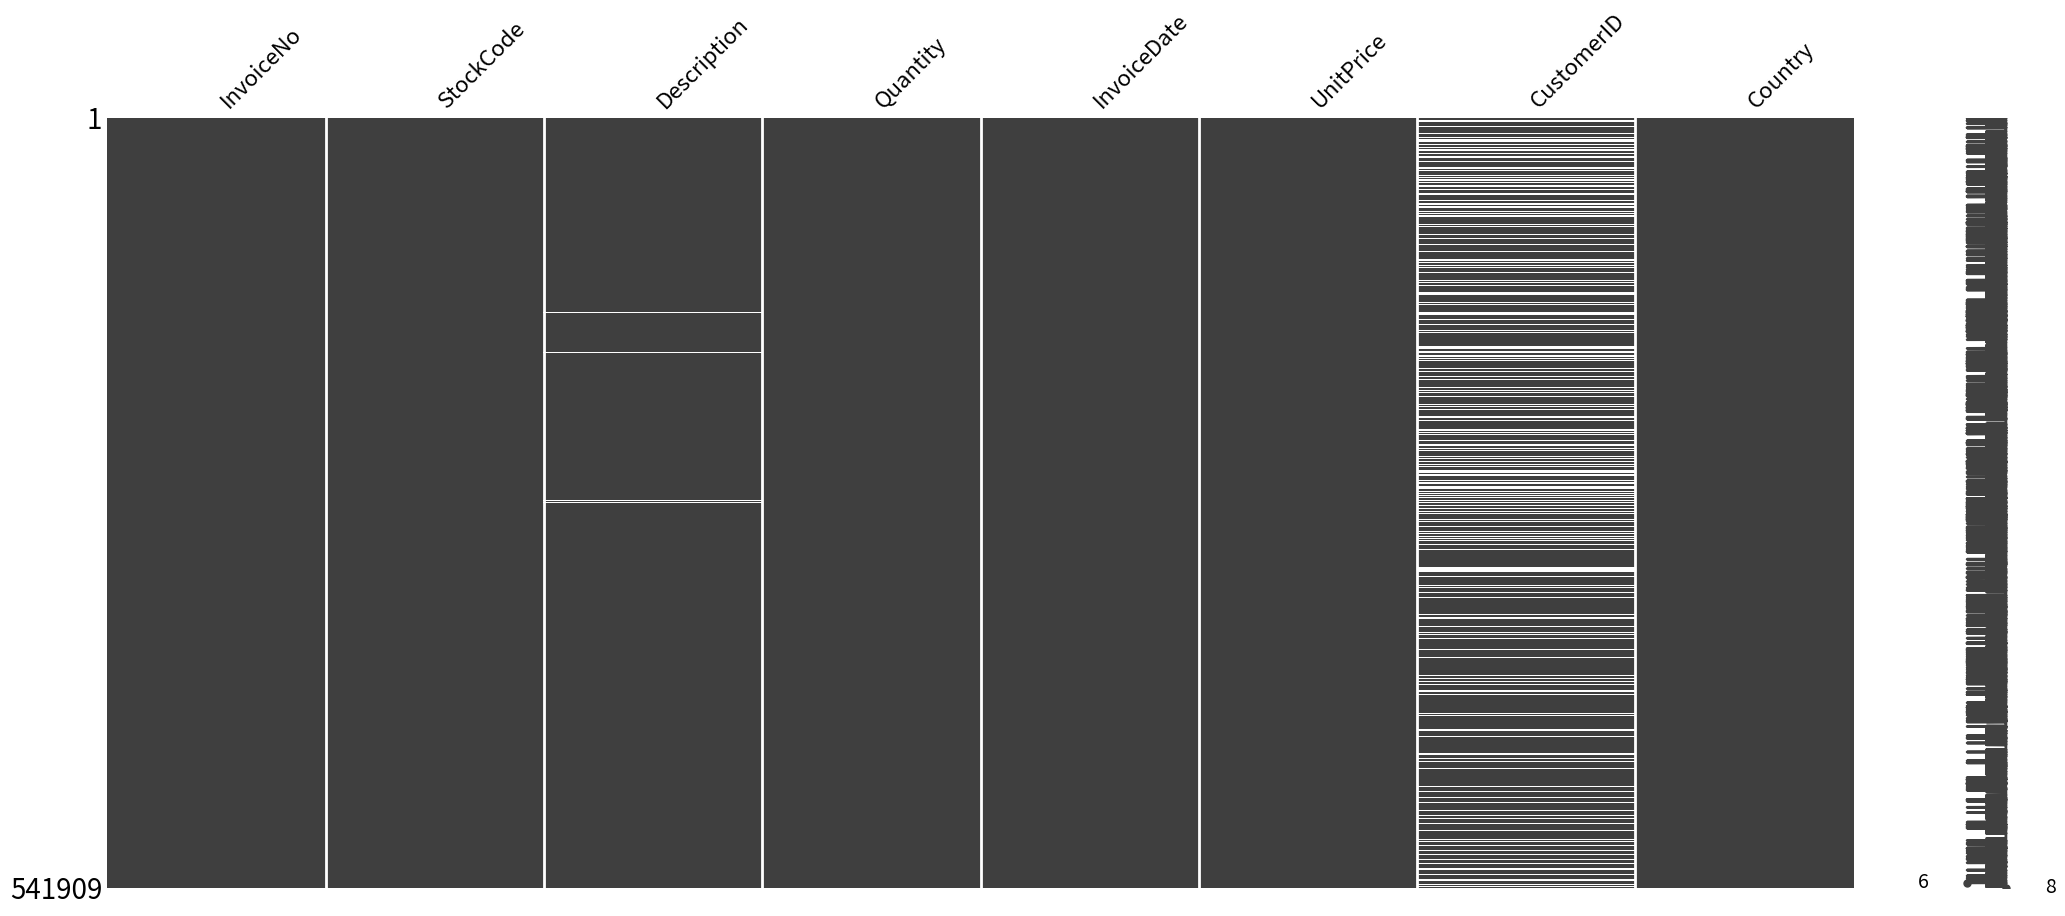

In [7]:
import missingno as msno
msno.matrix(df)
plt.show()

In [8]:
df.dropna(subset=['CustomerID'],how='all',inplace=True)

Let the column names are all in lowercase.

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

How many different countries are there?

In [11]:
df['country'].nunique()

37

What are the 10 countries with the most corresponding rows?

In [12]:
df['country'].value_counts()[:10].index.tolist()

['United Kingdom',
 'Germany',
 'France',
 'EIRE',
 'Spain',
 'Netherlands',
 'Belgium',
 'Switzerland',
 'Portugal',
 'Australia']

TOP5 Expensive Products

In [13]:
df.sort_values(by='unitprice', ascending=False).head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00000,15098.00000,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75000,16029.00000,United Kingdom
173277,C551685,POST,POSTAGE,-1,5/3/2011 12:51,8142.75000,16029.00000,United Kingdom
173391,C551699,M,Manual,-1,5/3/2011 14:12,6930.00000,16029.00000,United Kingdom
268027,C560372,M,Manual,-1,7/18/2011 12:26,4287.63000,17448.00000,United Kingdom


Top 5 best-selling products

In [14]:
df.groupby(["stockcode","description"]).agg({"quantity": lambda x: x.sum()})\
              .rename({'quantity':'total_quantity'},axis=1).nlargest(5,'total_quantity')

,,total_quantity
stockcode,description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
85099B,JUMBO BAG RED RETROSPOT,45066
84879,ASSORTED COLOUR BIRD ORNAMENT,35314
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147
21212,PACK OF 72 RETROSPOT CAKE CASES,33409


In [15]:
print(f"Number of unique values ​​for StockCode: {df['stockcode'].nunique()}")
print(f"Number of unique values ​​for Description: {df['description'].nunique()}")

Number of unique values ​​for StockCode: 3684
Number of unique values ​​for Description: 3896


In [16]:
# drop the remaining missing values
df = df.dropna()

In [17]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
quantity,406829.00000,12.06130,248.69337,-80995.00000,-2.00000,1.00000,1.00000,2.00000,5.00000,12.00000,24.00000,36.00000,120.00000,80995.00000
unitprice,406829.00000,3.46047,69.31516,0.00000,0.21000,0.42000,0.55000,1.25000,1.95000,3.75000,6.75000,8.50000,15.00000,38970.00000
customerid,406829.00000,15287.69057,1713.60030,12346.00000,12415.00000,12626.00000,12876.00000,13953.00000,15152.00000,16791.00000,17719.00000,17905.00000,18212.00000,18287.00000


There are negative values ​​in the Quantity variable, which are caused by refund invoices (invoices containing the letter "C").

In [18]:
df = df[~df["invoiceno"].str.contains("C", na=False)]

In [19]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
quantity,397924.00000,13.02182,180.42021,1.00000,1.00000,1.00000,1.00000,2.00000,6.00000,12.00000,24.00000,36.00000,120.00000,80995.00000
unitprice,397924.00000,3.11617,22.09679,0.00000,0.21000,0.42000,0.55000,1.25000,1.95000,3.75000,6.35000,8.50000,14.95000,8142.75000
customerid,397924.00000,15294.31517,1713.16988,12346.00000,12415.00000,12627.00000,12883.00000,13969.00000,15159.00000,16795.00000,17725.00000,17912.00000,18211.00000,18287.00000


Excluding outliers

In [20]:
df = df.query('quantity>0 and unitprice>0')

Convert date to year-month-day

In [21]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'].str.split(' ',expand=True).iloc[:,0])
df['invoicedate']

,invoicedate
0,2010-12-01
1,2010-12-01
2,2010-12-01
3,2010-12-01
4,2010-12-01
...,...
541904,2011-12-09
541905,2011-12-09
541906,2011-12-09
541907,2011-12-09


In [22]:
# Add fields for grouping
df['year'] = df.invoicedate.dt.year
df['month'] = df.invoicedate.dt.month
df['months'] = df.year.astype(str) + '-' + df.month.astype(str)
df['totalcost'] =  df['unitprice'] * df['quantity']

In [23]:
df.dtypes

,0
invoiceno,object
stockcode,object
description,object
quantity,int64
invoicedate,datetime64[ns]
unitprice,float64
customerid,float64
country,object
year,int32
month,int32


In [24]:
df['customerid'] = df['customerid'].astype(int)

## RFM

### RFM Calculation

In [25]:
# Create an RFM table and pivot the DataFrame using pivot_table
rfm = df.pivot_table(
    index='customerid',  # Set the pivot table's index column to 'customerid', with each customer corresponding to one row
    values=["invoiceno", "totalcost", "invoicedate"],  # Columns to be aggregated
    aggfunc={
        "invoiceno": pd.Series.nunique,  # Count the number of unique invoices per customer using pd.Series.nunique
        "totalcost": "sum",  # Use "sum" to calculate the total cost of each customer
        "invoicedate": "max"  # Use "max" to calculate the latest purchase date for each customer
    }
)

1. **`df.pivot_table(...)`：** This method reorganizes the data through a pivot table, using "customerid" as the index to count the relevant information of each customer.
2. **`index='customerid'`：** By setting the index to "customerid", we ensure that each customer corresponds to a row in the pivot table.
3. **`values=["invoiceno", "totalcost", "invoicedate"]`：** We select the columns that need to be aggregated, including invoice number ("invoiceno"), total cost ("totalcost"), and invoice date ("invoicedate").
4. **`aggfunc={...}`：** In the `aggfunc` parameter, we define the aggregation operation to be performed on each customer:
   - **`"invoiceno": pd.Series.nunique`：** Count the number of unique invoices for each customer.`pd.Series.nunique`Used to count the number of unique values.
   - **`"totalcost": "sum"`：** Calculate the total cost for each customer and add up all the costs.
   - **`"invoicedate": "max"`：** Calculate the latest purchase date for each customer and take the maximum value of the dates.
5. **Result：** The resulting `rfm` table contains the RFM information for each customer, where each row represents a customer and the columns include the number of unique invoices, total spend, and the latest purchase date. This RFM analysis can be used for customer segmentation and personalized marketing.

In [26]:
# The largest transaction date of all users is taken as the standard, and the time interval between each transaction is R
rfm['Recency'] = (rfm.invoicedate.max() - rfm.invoicedate) / np.timedelta64(1, 'D')

# # The total sales volume for each customer is F, and the total sales amount is M
rfm.rename(columns={
        "invoiceno": "Frequency",
        "totalcost": "Monetary"
    }, inplace = True)
rfm.head()

,invoicedate,Frequency,Monetary,Recency
customerid,,,,
12346,2011-01-18,1,77183.60000,325.00000
12347,2011-12-07,7,4310.00000,2.00000
12348,2011-09-25,4,1797.24000,75.00000
12349,2011-11-21,1,1757.55000,18.00000
12350,2011-02-02,1,334.40000,310.00000


For example, when doing user research recently, users are classified according to their scores. In actual operation, users are classified into three categories (0-6 category, 7-8 category, etc.)

Then the customer value is marked and customers are divided into 8 levels.

![Imgur](https://i.imgur.com/Nk37UIz.png)




In [27]:
# Comparison is based on the mean, if it exceeds the mean, it is 1, otherwise it is 0
rfm[['Recency','Frequency','Monetary']].apply(lambda x:(x-x.mean())/x.std())

def rfm_func(x):
    level = x.apply(lambda x:'1'if x>0 else '0')
    level = level.Recency + level.Frequency + level.Monetary
    d = {
        "011": "Important value customers",
        "111": "Important keeping customers",
        "001": "Important retention customer",
        "101": "Important development customers",
        "110": "Normal value customers",
        "010": "Normal keeping customers",
        "100": "Normal retention customer",
        "000": "Normal development customers"
    }
    result = d[level]
    return result

rfm['label']= rfm[['Recency','Frequency','Monetary']].apply(lambda x:(x-x.mean())/x.std()).apply(rfm_func, axis=1)
rfm.head()

,invoicedate,Frequency,Monetary,Recency,label
customerid,,,,,
12346,2011-01-18,1,77183.60000,325.00000,Important development customers
12347,2011-12-07,7,4310.00000,2.00000,Important value customers
12348,2011-09-25,4,1797.24000,75.00000,Normal development customers
12349,2011-11-21,1,1757.55000,18.00000,Normal development customers
12350,2011-02-02,1,334.40000,310.00000,Normal retention customer


Visualize the important and non-important value customers

In [28]:
rfm.label.unique()

array(['Important development customers', 'Important value customers',
       'Normal development customers', 'Normal retention customer',
       'Important retention customer', 'Normal keeping customers',
       'Normal value customers', 'Important keeping customers'],
      dtype=object)

Calculation using SQL

In [29]:
import sqlite3
import pandas as pd

dataset_path = '/content/drive/My Drive/项目/rfm/'
df = pd.read_csv(dataset_path+"rfm_stock_data.csv", encoding='ISO-8859-1')

# Convert date format
df = df.dropna()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['CustomerID'] = df['CustomerID'].astype(int)

# Create a SQLite Database Connection
conn = sqlite3.connect('rfm.db')
cursor = conn.cursor()

# Storing DataFrame into SQLite table
df.to_sql('sales_data', conn, if_exists='replace', index=False)

406829

In [30]:
cursor.execute('''

WITH rfm_values AS (

    SELECT
        CustomerID,
        -- Calculate the last purchase date for each customer and convert it to YYYY-MM-DD format
        JULIANDAY((SELECT MAX(DATE(InvoiceDate)) FROM sales_data)) - JULIANDAY(MAX(DATE(InvoiceDate))) AS Recency,

        -- Calculate purchase frequency
        COUNT(DISTINCT InvoiceNo) AS Frequency,

        -- Calculate the total amount of consumption
        SUM(Quantity * UnitPrice) AS Monetary
    FROM
        sales_data
    WHERE Quantity>0
    and UnitPrice>0
    GROUP BY
        CustomerID
),
rfm_scores AS (
    SELECT
        *,
        NTILE(2) OVER (ORDER BY Recency ASC)-1 AS RecencyScore,
        NTILE(2) OVER (ORDER BY Frequency ASC)-1 AS FrequencyScore,
        NTILE(2) OVER (ORDER BY Monetary ASC)-1 AS MonetaryScore
    FROM
        rfm_values
)
SELECT
    CustomerID,
    Recency,
    Frequency,
    Monetary,
    (RecencyScore || FrequencyScore || MonetaryScore) AS RFM_Segment,
    CASE (RecencyScore || FrequencyScore || MonetaryScore)
        WHEN '011' THEN 'Important value customers'
        WHEN '111' THEN 'Important keeping customers'
        WHEN '001' THEN 'Important retention customer'
        WHEN '101' THEN 'Important development customers'
        WHEN '110' THEN 'Normal value customers'
        WHEN '010' THEN 'Normal keeping customers'
        WHEN '100' THEN 'Normal retention customer'
        WHEN '000' THEN 'Normal development customers'
        ELSE 'Unknown customer type'
    END AS tag
FROM
    rfm_scores
ORDER BY
    CustomerID;



''')


# Get the results
results = cursor.fetchall()
columns = [description[0] for description in cursor.description]
rfm_df = pd.DataFrame(results, columns=columns)

In [31]:
rfm_df.set_index('CustomerID')

,Recency,Frequency,Monetary,RFM_Segment,tag
CustomerID,,,,,
12346,325.00000,1,77183.60000,101,Important development customers
12347,2.00000,7,4310.00000,011,Important value customers
12348,75.00000,4,1797.24000,111,Important keeping customers
12349,18.00000,1,1757.55000,001,Important retention customer
12350,310.00000,1,334.40000,100,Normal retention customer
...,...,...,...,...,...
18280,277.00000,1,180.60000,100,Normal retention customer
18281,180.00000,1,80.82000,100,Normal retention customer
18282,7.00000,2,178.05000,000,Normal development customers


In [32]:
rfm

,invoicedate,Frequency,Monetary,Recency,label
customerid,,,,,
12346,2011-01-18,1,77183.60000,325.00000,Important development customers
12347,2011-12-07,7,4310.00000,2.00000,Important value customers
12348,2011-09-25,4,1797.24000,75.00000,Normal development customers
12349,2011-11-21,1,1757.55000,18.00000,Normal development customers
12350,2011-02-02,1,334.40000,310.00000,Normal retention customer
...,...,...,...,...,...
18280,2011-03-07,1,180.60000,277.00000,Normal retention customer
18281,2011-06-12,1,80.82000,180.00000,Normal retention customer
18282,2011-12-02,2,178.05000,7.00000,Normal development customers


### Visualization

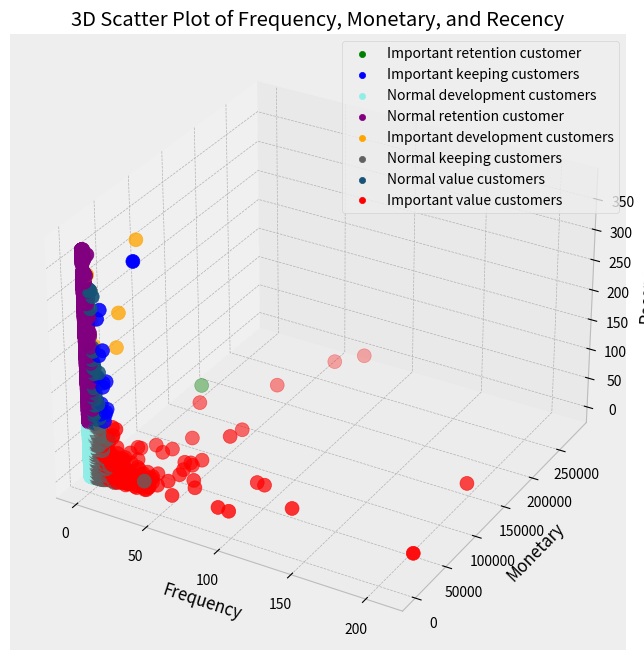

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating 3D Plots
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

df = rfm.copy()


# Set the color according to "Label"
colors = {'Important retention customer': 'green',
      'Important keeping customers': 'blue',
      'Normal development customers': '#91eee7',
      'Normal retention customer': 'purple',
      'Important development customers': 'orange',
      'Normal keeping customers': '#616161',
      'Normal value customers': '#165376',
      'Important value customers': 'red',}

# Check if all labels in the DataFrame are in the colors dictionary
invalid_labels = set(df['label'].unique()) - set(colors.keys())
if invalid_labels:
    raise ValueError(f"The following labels do not have corresponding colors: {invalid_labels}")

# Draw a scatter plot
scatter = ax.scatter(
    df['Frequency'],
    df['Monetary'],
    df['Recency'],
    c=df['label'].map(colors),  # Use the map method to map labels to colors
    s=100
)

# Add axis labels
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Recency')

# Add a legend
for label, color in colors.items():
    ax.scatter([], [], [], c=color, label=label)  # 添加空点作为图例项

# Setting the Legend
ax.legend()

# Set the title
plt.title('3D Scatter Plot of Frequency, Monetary, and Recency')

# Display Chart
plt.show()


In [34]:
import plotly.express as px
import pandas as pd

# Your DataFrame
df = rfm.copy()

# Your color mapping
colors = {'Important retention customer': 'green',
      'Important keeping customers': 'blue',
      'Normal development customers': '#91eee7',
      'Normal retention customer': 'purple',
      'Important development customers': 'orange',
      'Normal keeping customers': '#616161',
      'Normal value customers': '#165376',
      'Important value customers': 'red',}

# Check if all labels in the DataFrame are in the colors dictionary
invalid_labels = set(df['label'].unique()) - set(colors.keys())
if invalid_labels:
    raise ValueError(f"The following labels do not have corresponding colors: {invalid_labels}")

# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x='Frequency',
    y='Monetary',
    z='Recency',
    color='label',
    color_discrete_map=colors,
    symbol='label',
    size_max=2,
    opacity=0.7,
    labels={'Frequency': 'Frequency', 'Monetary': 'Monetary', 'Recency': 'Recency'},
    title='3D Scatter Plot of Frequency, Monetary, and Recency',
)

# Save the chart as an HTML file
plotly_html_file = "plotly_example.html"
fig.write_html(plotly_html_file)

However, in the stock trading scenario, the stratification and definition of customers will be different.

Use kmeans for clustering and further analysis.

### K-Means

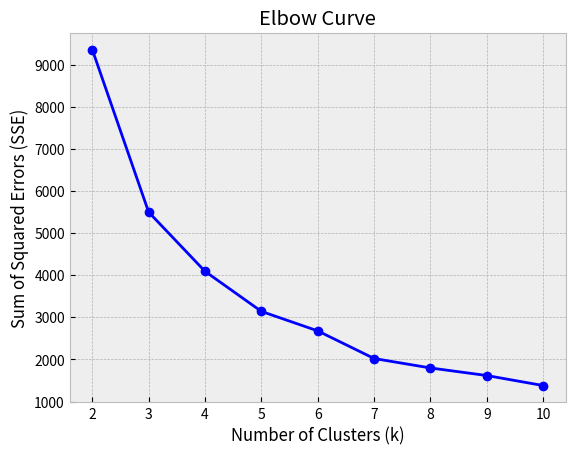

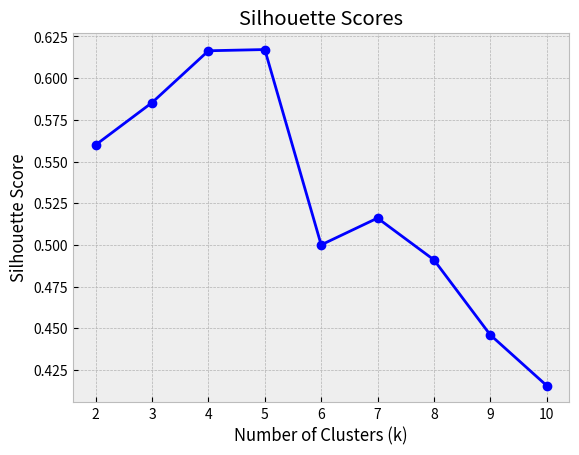

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Use the original features completely and try kmeans
# On the basis of rfm, add some new features

rfm_segmentation = rfm[['Recency','Frequency','Monetary']].copy()

# Determine the optimal value of k using the elbow method
sse = []
silhouette_scores = []
k_values = range(2, 11)

X = rfm_segmentation.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=1, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


# kmeans++
#for k in k_values:
#    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
#    kmeans.fit(X)


# Plot the elbow curve
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

By identifying different customer groups through RFM, it is possible to measure customer value and customer profit-generating ability, and to specify personalized communication and marketing services, providing strong support for more marketing decisions and creating greater benefits for the company.

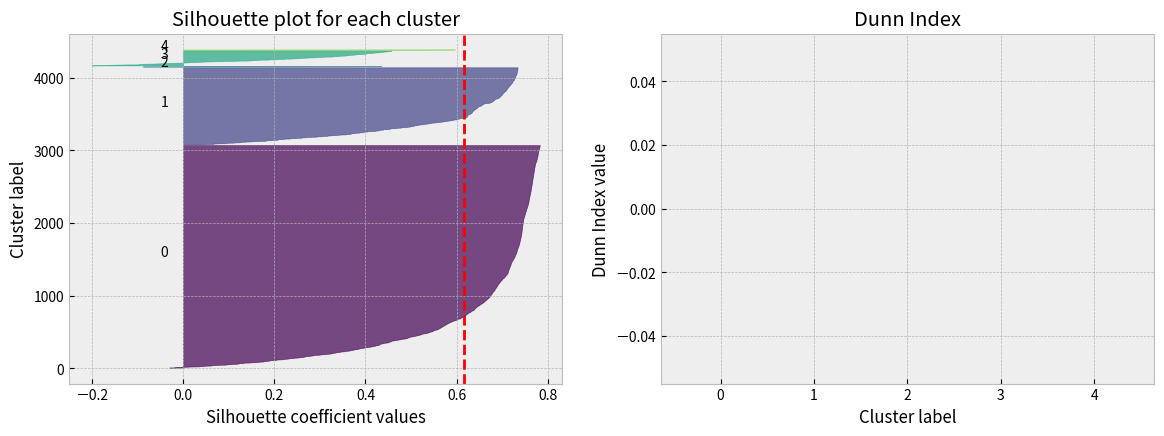

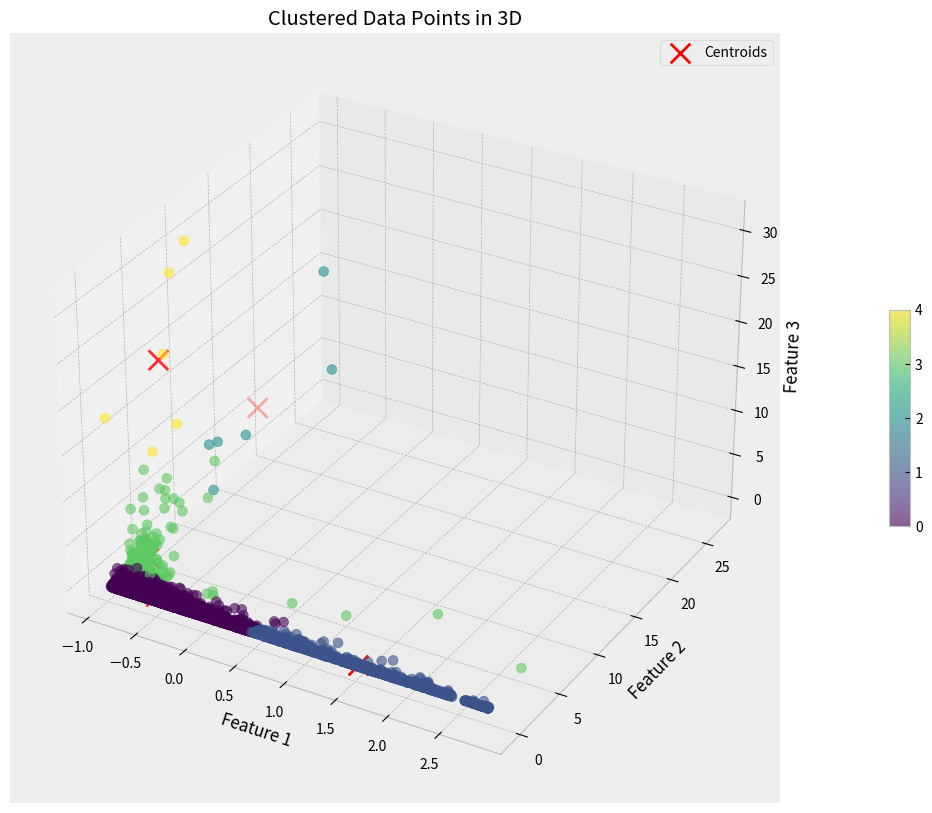

<Figure size 640x480 with 0 Axes>

In [36]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

X = rfm_segmentation.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#fitting data in Kmeans theorem.
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Calculating evaluation metrics
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
db_index = davies_bouldin_score(X_scaled, cluster_labels)

# Dunn index calculation function
def dunn_index(X, labels):
    from sklearn.metrics import pairwise_distances
    import numpy as np

    unique_labels = np.unique(labels)
    min_dist = np.inf
    max_dist = -np.inf

    for i in range(len(unique_labels)):
        cluster_points = X[labels == unique_labels[i]]
        pairwise_dist = pairwise_distances(cluster_points)
        intra_cluster_dist = np.mean(np.min(pairwise_dist, axis=1))
        min_dist = min(min_dist, intra_cluster_dist)

        for j in range(i + 1, len(unique_labels)):
            inter_cluster_dist = np.mean(pairwise_distances(cluster_points, X[labels == unique_labels[j]]))
            max_dist = max(max_dist, inter_cluster_dist)

    return min_dist / max_dist

dunn = dunn_index(X_scaled, cluster_labels)

# Visualizing clusters
plt.figure(figsize=(14, 10))

# Plotting Silhouette scores
plt.subplot(2, 2, 1)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
y_lower = 10
for i in range(k):
    cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.viridis(float(i) / k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette plot for each cluster")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# Plotting Dunn index
plt.subplot(2, 2, 2)
plt.bar(range(k), [dunn] * k, color='gray')
plt.title("Dunn Index")
plt.xlabel("Cluster label")
plt.ylabel("Dunn Index value")

# Visualizing clusters in 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting clustered data points
sc = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6, s=50)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='x', s=200, color='red', label='Centroids')

# Adding titles and labels
ax.set_title('Clustered Data Points in 3D')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()

# Adding color bar
plt.colorbar(sc, ax=ax, fraction=0.02, pad=0.1, aspect=10)

plt.show()

plt.tight_layout()
plt.show()


In [37]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['kmeans_cluster'] = kmeans.labels_

#check our hypothesis
rfm_segmentation[rfm_segmentation.kmeans_cluster == 0].head(10)

,Recency,Frequency,Monetary,kmeans_cluster
customerid,,,,
12347,2.00000,7,4310.00000,0
12348,75.00000,4,1797.24000,0
12349,18.00000,1,1757.55000,0
12350,310.00000,1,334.40000,0
12352,36.00000,8,2506.04000,0
12353,204.00000,1,89.00000,0
12354,232.00000,1,1079.40000,0
12355,214.00000,1,459.40000,0
12356,22.00000,3,2811.43000,0


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = rfm[['Recency','Frequency','Monetary']].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(X_scaled)

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

# Print the number of clusters and noise points
print('Estimated number of clusters:', n_clusters)
print('Estimated number of noise points:', n_noise)

Estimated number of clusters: 3
Estimated number of noise points: 162


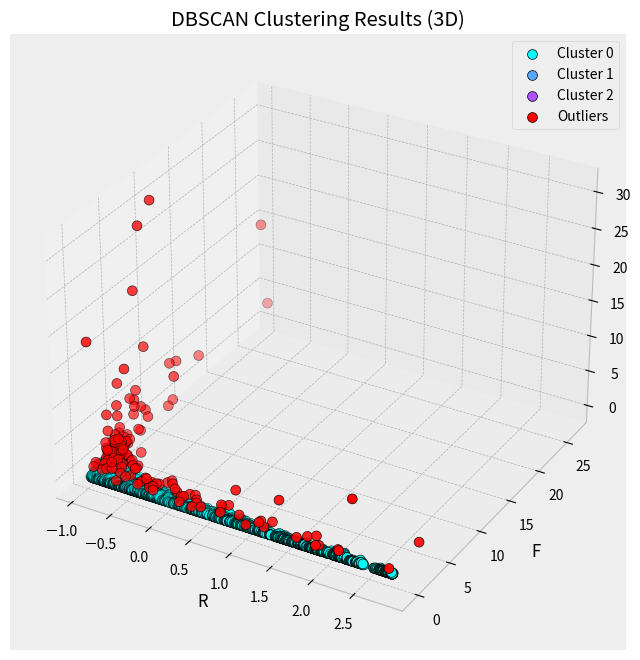

In [39]:
# Custom color map
custom_cmap = plt.cm.get_cmap('cool', len(set(clusters)))

# Visualize the clusters in 3D with custom colors
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting clusters with legend
for cluster_label in set(clusters):
    if cluster_label == -1:
        # Plot outliers separately
        ax.scatter(
            X_scaled[clusters == cluster_label, 0],
            X_scaled[clusters == cluster_label, 1],
            X_scaled[clusters == cluster_label, 2],
            c='red',
            label='Outliers',
            marker='o',
            edgecolors='k',
            s=50
        )
    else:
        ax.scatter(
            X_scaled[clusters == cluster_label, 0],
            X_scaled[clusters == cluster_label, 1],
            X_scaled[clusters == cluster_label, 2],
            c=[custom_cmap(cluster_label)],
            label=f'Cluster {cluster_label}',
            marker='o',
            edgecolors='k',
            s=50
        )

ax.set_title('DBSCAN Clustering Results (3D)')
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

# Add legend
ax.legend()

plt.show()


In [40]:
rfm_segmentation['DBSCAN_cluster'] = clusters

In [41]:
rfm_segmentation

,Recency,Frequency,Monetary,kmeans_cluster,DBSCAN_cluster
customerid,,,,,
12346,325.00000,1,77183.60000,2,-1
12347,2.00000,7,4310.00000,0,0
12348,75.00000,4,1797.24000,0,0
12349,18.00000,1,1757.55000,0,0
12350,310.00000,1,334.40000,0,0
...,...,...,...,...,...
18280,277.00000,1,180.60000,0,0
18281,180.00000,1,80.82000,0,0
18282,7.00000,2,178.05000,0,0


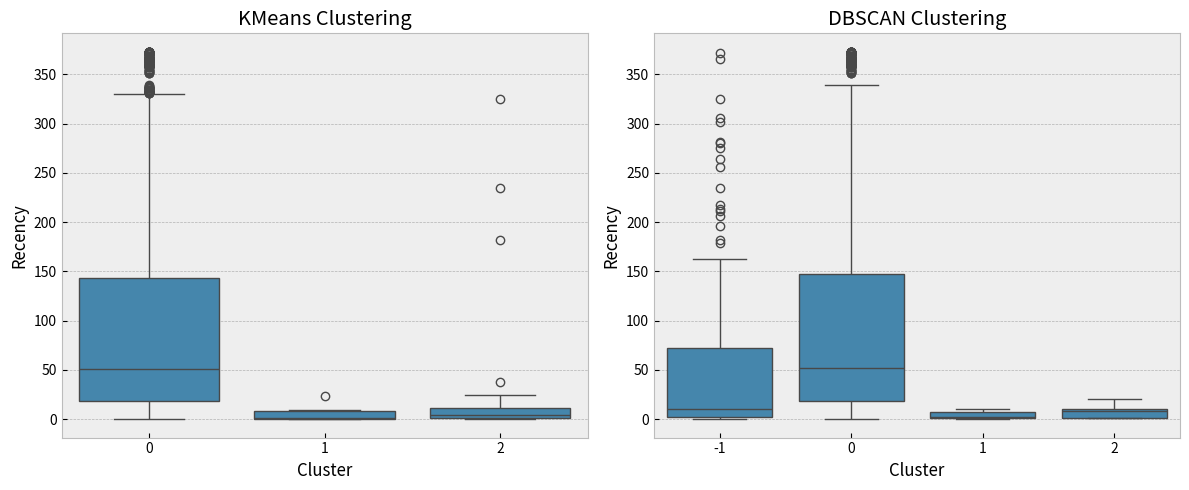

In [42]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Boxplot for KMeans clusters
sns.boxplot(x=rfm_segmentation['kmeans_cluster'], y=rfm_segmentation['Recency'], ax=axes[0])
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Recency')

# Subplot 2: Boxplot for DBSCAN clusters
sns.boxplot(x=rfm_segmentation['DBSCAN_cluster'], y=rfm_segmentation['Recency'], ax=axes[1])
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Recency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

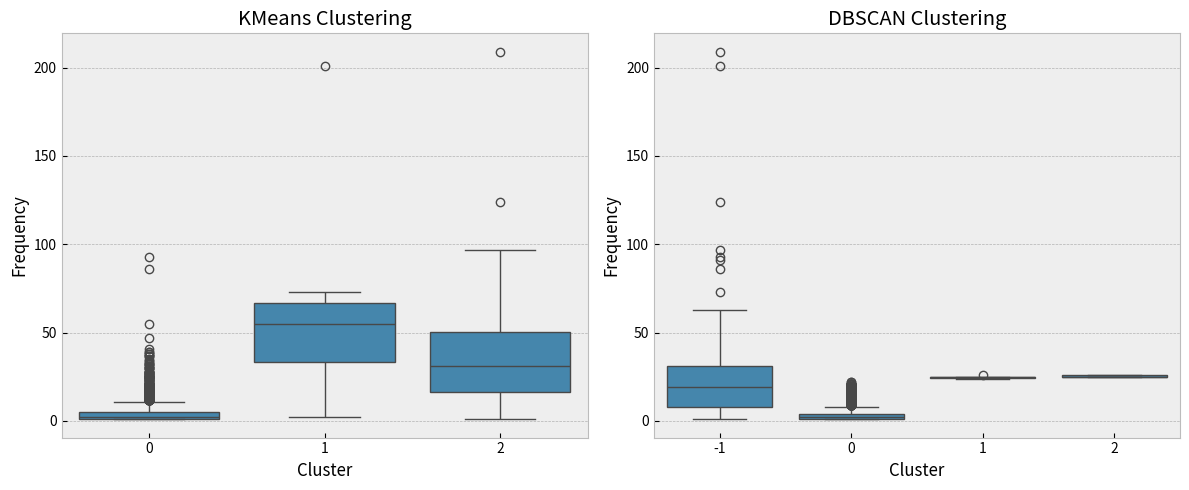

In [43]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Boxplot for KMeans clusters
sns.boxplot(x=rfm_segmentation['kmeans_cluster'], y=rfm_segmentation['Frequency'], ax=axes[0])
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Frequency')

# Subplot 2: Boxplot for DBSCAN clusters
sns.boxplot(x=rfm_segmentation['DBSCAN_cluster'], y=rfm_segmentation['Frequency'], ax=axes[1])
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

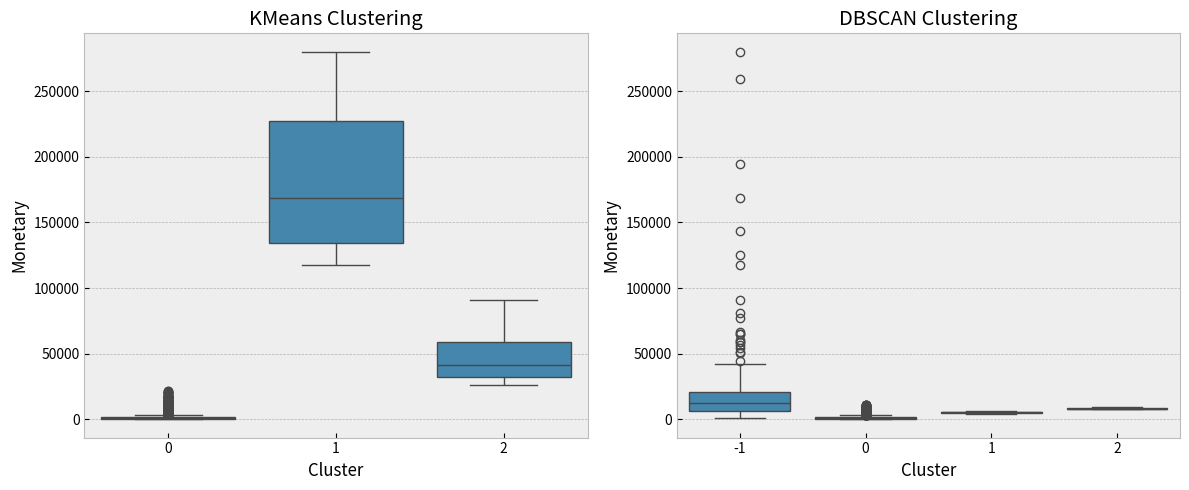

In [44]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Subplot 1: Boxplot for KMeans clusters
sns.boxplot(x=rfm_segmentation['kmeans_cluster'], y=rfm_segmentation['Monetary'], ax=axes[0])
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Monetary')

# Subplot 2: Boxplot for DBSCAN clusters
sns.boxplot(x=rfm_segmentation['DBSCAN_cluster'], y=rfm_segmentation['Monetary'], ax=axes[1])
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Monetary')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Segmentation

In [45]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)

#lower the recency, good for store..
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

#higher value of frequency and monetary lead to a good consumer. here higher value = 1 in reverse way.

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [46]:
'''
quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25%
then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75%
values.
'''
quantile = rfm[['Frequency','Monetary','Recency']].quantile(q=[0.25,0.5,0.75])
quantile

,Frequency,Monetary,Recency
0.25000,1.00000,307.41500,17.00000
0.50000,2.00000,674.48500,50.00000
0.75000,5.00000,1661.74000,141.75000


In [47]:
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore,args=('Recency',quantile))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [48]:
#calculate RFM score..

rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,kmeans_cluster,DBSCAN_cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore
customerid,,,,,,,,,
12346,325.00000,1,77183.60000,2,-1,4,4,1,441
12347,2.00000,7,4310.00000,0,0,1,1,1,111
12348,75.00000,4,1797.24000,0,0,3,2,1,321
12349,18.00000,1,1757.55000,0,0,2,4,1,241
12350,310.00000,1,334.40000,0,0,4,4,3,443


In [49]:
'''
Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score
between 3 and 12. Here the advantage is that each of the scores got same importance. However some scores
will have many segments as constituents (eg - 413 ad 431)
'''

rfm_segmentation['Total_score'] = rfm_segmentation['R_Quartile'] + rfm_segmentation['F_Quartile'] + \
rfm_segmentation['M_Quartile']

In [50]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,kmeans_cluster,DBSCAN_cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
customerid,,,,,,,,,,
12346,325.00000,1,77183.60000,2,-1,4,4,1,441,9
12347,2.00000,7,4310.00000,0,0,1,1,1,111,3
12348,75.00000,4,1797.24000,0,0,3,2,1,321,6
12349,18.00000,1,1757.55000,0,0,2,4,1,241,7
12350,310.00000,1,334.40000,0,0,4,4,3,443,11


In [51]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='134']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='344']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  456
Loyal Customers:  872
Big Spenders:  1085
Almost Lost:  34
Lost Customers:  208
Lost Cheap Customers:  444


In [52]:
rfm_segmentation.sort_values(by=['RFMScore', 'Monetary'], ascending=[True, False])

,Recency,Frequency,Monetary,kmeans_cluster,DBSCAN_cluster,R_Quartile,F_Quartile,M_Quartile,RFMScore,Total_score
customerid,,,,,,,,,,
14646,1.00000,73,280206.02000,1,-1,1,1,1,111,3
18102,0.00000,60,259657.30000,1,-1,1,1,1,111,3
17450,8.00000,46,194550.79000,1,-1,1,1,1,111,3
14911,1.00000,201,143825.06000,1,-1,1,1,1,111,3
14156,9.00000,55,117379.63000,1,-1,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...,...
17102,261.00000,1,25.50000,0,0,4,4,4,444,12
15823,372.00000,1,15.00000,0,0,4,4,4,444,12
17763,263.00000,1,15.00000,0,0,4,4,4,444,12


In [53]:
rfm_segmentation.groupby('RFMScore')['Monetary'].mean()

,Monetary
RFMScore,
111,9547.54000
112,1286.33127
113,511.27000
114,253.92000
121,2910.55886
...,...
434,214.62952
441,8910.26727
442,994.80000


In [54]:
rfm_segmentation.groupby('Total_score')['Monetary'].mean()

,Monetary
Total_score,
3,9547.54000
4,4164.12704
5,2431.43759
6,1456.71865
7,1201.25163
8,782.68758
9,717.96994
10,384.77030
11,288.07245


<Axes: xlabel='Total_score'>

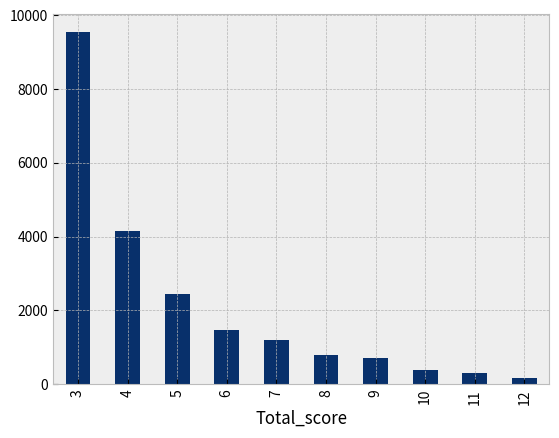

In [55]:
'''
Based on Monetary we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total_score'>

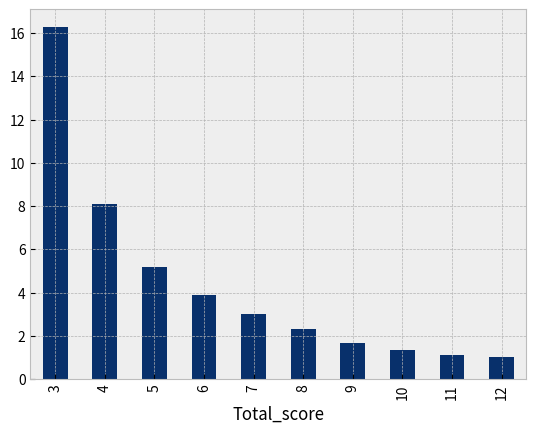

In [56]:
'''
Based on Frequncy we see Total_score 3,4,5 have highest value which is good for model. because it could have
combination of values such as 111, 121, 122 etc.
'''
rfm_segmentation.groupby('Total_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')

<Axes: xlabel='Total_score'>

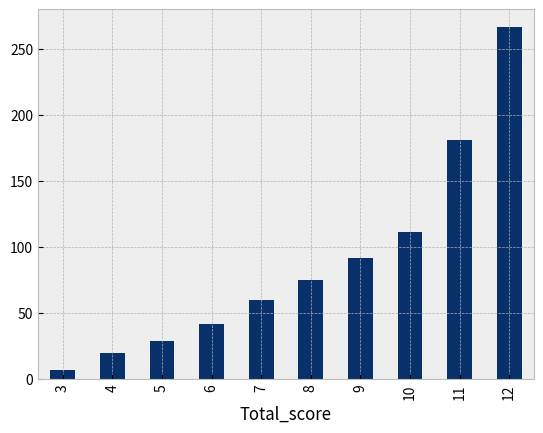

In [57]:
'''
Based on Recency we see Total_score 10,11,12 have highest value which is good for model. because it could have
combination of values such as 444, 434, 334 etc.
'''

rfm_segmentation.groupby('Total_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')

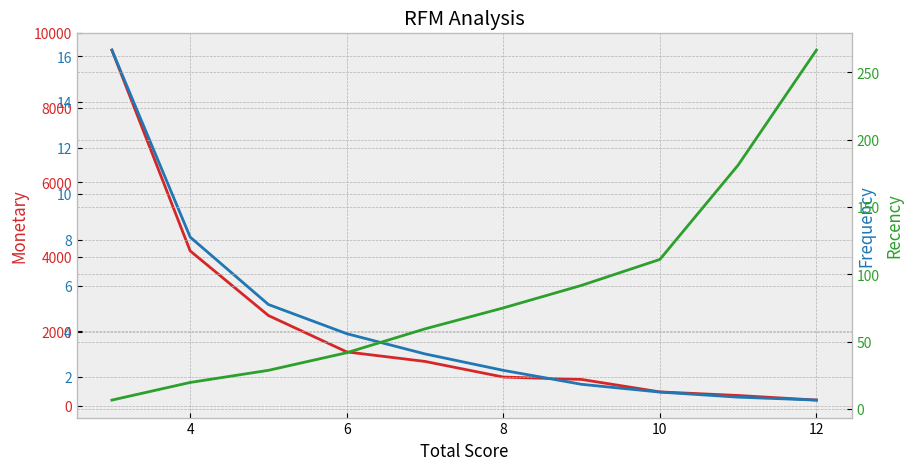

In [58]:
m = rfm_segmentation.groupby('Total_score')['Monetary'].mean()
f = rfm_segmentation.groupby('Total_score')['Frequency'].mean()
r = rfm_segmentation.groupby('Total_score')['Recency'].mean()

plt.style.use('bmh')
fig, ax1 = plt.subplots(figsize = [10,5])

color = 'tab:red'
ax1.plot(m.index, m.values,color=color)
ax1.set_title('RFM Analysis')
ax1.set_xlabel('Total Score')
ax1.set_ylabel('Monetary', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(f.index, f.values,color=color)
ax2.set_ylabel('Frequency', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()

color = 'tab:green'
ax3.plot(r.index, r.values,color=color)
ax3.set_ylabel('Recency', color=color)
ax3.tick_params(axis='y', labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()